In [9]:
import os
import pandas as pd
import requests
import json
import pprint
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

In [10]:
csv_path = "Resources/New_Disaster.csv"

New_df = pd.read_csv(csv_path)

New_df.head()

,ISO3,Name,Year,Disaster New Displacements,Conflict Stock Displacement,Conflict New Displacements
0,TCD,Chad,2009,5800.0,168000.0,NaN
1,ETH,Ethiopia,2009,NaN,350000.0,200000.0
2,MWI,Malawi,2009,21000.0,NaN,NaN
3,MOZ,Mozambique,2009,7300.0,NaN,NaN
4,NER,Niger,2009,5600.0,11000.0,NaN


In [13]:
grouped_year_df = New_df.groupby(['Year'])

grouped_year_df.count().head()


,ISO3,Name,Disaster New Displacements,Conflict Stock Displacement,Conflict New Displacements
Year,,,,,
2009,40,40,24,17,10
2010,40,40,28,17,8
2011,38,38,19,19,11
2012,36,36,26,20,12
2013,42,42,39,21,12


In [15]:
conflict_total = grouped_year_df['Conflict New Displacements'].sum()
conflict_total

Year
2009    2316500.0
2010    1401700.0
2011    2593000.0
2012    2545450.0
2013    3756000.0
2014    4964500.0
2015    4512200.0
2016    3263800.0
2017    5660320.0
2018    7768800.0
2019    5211702.0
Name: Conflict New Displacements, dtype: float64

In [16]:
disaster_total = grouped_year_df['Disaster New Displacements'].sum()
disaster_total

Year
2009    1121100.0
2010    1706350.0
2011     603100.0
2012    5930300.0
2013    1609038.0
2014     646257.0
2015    1210287.0
2016    1122470.0
2017    2559761.0
2018    2631805.0
2019    3425640.0
Name: Disaster New Displacements, dtype: float64

In [19]:
summary_df = pd.DataFrame({"New Conflict Displacements": conflict_total,
                                    "New Disaster Displacements": disaster_total})
summary_df.head()

,New Conflict Displacements,New Disaster Displacements
Year,,
2009,2316500.0,1121100.0
2010,1401700.0,1706350.0
2011,2593000.0,603100.0
2012,2545450.0,5930300.0
2013,3756000.0,1609038.0


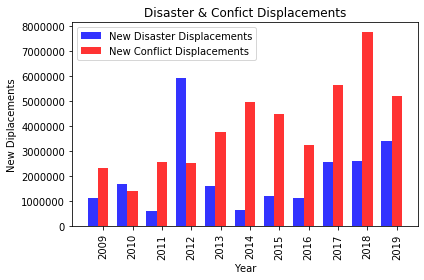

In [20]:
n_groups = 11
year = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
disasters = summary_df["New Disaster Displacements"]
conflicts = summary_df["New Conflict Displacements"]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, disasters, bar_width,
alpha=opacity,
color='b',
label='New Disaster Displacements')
 
rects2 = plt.bar(index + bar_width, conflicts, bar_width,
alpha=opacity,
color='r',
label='New Conflict Displacements')
 
plt.xlabel('Year')
plt.ylabel('New Diplacements')
plt.title('Disaster & Confict Displacements')
plt.xticks(index + bar_width, ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 
                               '2018', '2019'), rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()
fig.savefig('plot.png')

In [24]:
# displace_total = grouped_year_df.groupby(["Sex"])['Mouse ID'].count().reset_index()
# Gender_total = Gender_total.rename(columns={"Mouse ID": "Total"})
# Gender_total

conflictSUM = conflict_total.sum()
conflictSUM

43993972.0

In [25]:
disasterSUM = disaster_total.sum()
disasterSUM

22566108.0

In [26]:
types = ["Conflict", "Disaster"]
totals = [43993972, 22566108]
colors = ["red", "blue"]
explode = (0.0, 0.0)

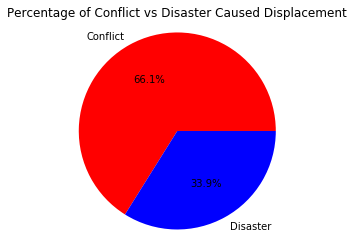

In [28]:
plt.pie(totals, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")
plt.title ("Percentage of Conflict vs Disaster Caused Displacement")
plt.show()